In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Goal:
Create a ML model to predict if the message if Spam or Ham

Process:
1. Clean data into a readable DF
2. Create new column length for data analysis
3. Use train test split on the data
4. Import CountVerctorization,Tfidf transformer, MultinomialNB, Pipeline and create Pipeline
5. Fit pipeline to training data
6. Create predictions
7. Evaluate model

Reading in the data, the data is seperated by tabs, so I need to specify sep

In [2]:
df = pd.read_csv('SMSSpamCollection',sep='\t',names=('result','text'))
df.head()

,result,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Creating a new column to show the length of the string

In [3]:
df['length'] = df['text'].apply(len)
df.head()

,result,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now we will visualise the difference between the Ham and Spam when it comes to length of messages

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1128ec8d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112bb41d0>], dtype=object)

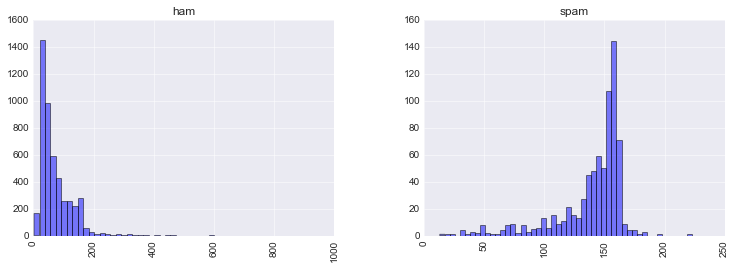

In [4]:
sns.set_style('darkgrid')
df.hist(column='length',by='result',bins=50,figsize=(12,4),alpha=0.5)

Now it's time to split the data into training and testing data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['result'],test_size=0.3)

Time to create the pipeline for the ML model

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline

In [8]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

Now we have created the pipeline we will fit it to our training data

In [9]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [10]:
predictions = pipeline.predict(X_test)

Now to analyse our results

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1459    0]
 [  75  138]]


             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      1459
       spam       1.00      0.65      0.79       213

avg / total       0.96      0.96      0.95      1672



# Let's now repeat the same model but this time we'll take out all punctiation and stop words from our initial data

In [13]:
from nltk.corpus import stopwords #stopwords
from string import punctuation

In [14]:
def text_process(mess):
    nopunc = [char for char in mess if char not in punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

I will redo our ML model with this function included to see if it improves

In [15]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('Tfidf',TfidfTransformer()),
    ('MNB',MultinomialNB())
])

In [16]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a1dcc5950>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...inear_tf=False, use_idf=True)), ('MNB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [17]:
predictions = pipeline.predict(X_test)

In [18]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1458    1]
 [  65  148]]


             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1459
       spam       0.99      0.69      0.82       213

avg / total       0.96      0.96      0.96      1672



# As you can see, our model was ever so slightly more accurate after this addition